In [1]:
import numpy as np
import pandas as pd
import timeit
from statistics import mean

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import lightgbm as lgbm

In [2]:
def regression_report(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

    print(f'Mean Absolute Error: {mae:.4f}')
    print(f'Mean Absolute Percentage Error: {mape:.4f}%')
    print(f'Mean Squared Error: {mse:.4f}')
    print(f'Root Mean Squared Error: {rmse:.4f}')
    print(f'Coefficient of Determination: {r2:.4f}')

In [3]:
def fit_regressor(regressor, x_tr, y_tr, **kwargs):
    regressor.fit(x_tr, y_tr, **kwargs)

def predict_regressor(regressor, x_te):
    return regressor.predict(x_te)

In [4]:
df = pd.read_csv('avocado.csv', index_col=0)

In [5]:
# split dataset into x and y
X = df.drop(columns='AveragePrice')
y = df['AveragePrice']

# turn object-type features into categories
obj_feat = list(X.loc[:, X.dtypes == 'object'].columns.values)
for feature in obj_feat:
    X[feature] = pd.Series(X[feature], dtype="category")

# create train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,
                                                    random_state=42)

In [6]:
# LightGBM
lgbmr = lgbm.LGBMRegressor(random_state=42)

In [7]:
time = timeit.repeat(lambda: fit_regressor(lgbmr, x_tr=X_train, y_tr=y_train), repeat=10, number=1)
print(f"Average fitting time: {mean(time):0.6f} seconds")

time2 = timeit.repeat(lambda: predict_regressor(lgbmr, x_te=X_test), repeat=10, number=1)
print(f"Average prediction time: {mean(time2):0.6f} seconds")

Average fitting time: 0.184723 seconds
Average prediction time: 0.007682 seconds


In [8]:
y_hat = lgbmr.predict(X_test)
regression_report(y_test, y_hat)

Mean Absolute Error: 0.0879
Mean Absolute Percentage Error: 6.4488%
Mean Squared Error: 0.0138
Root Mean Squared Error: 0.1174
Coefficient of Determination: 0.9142


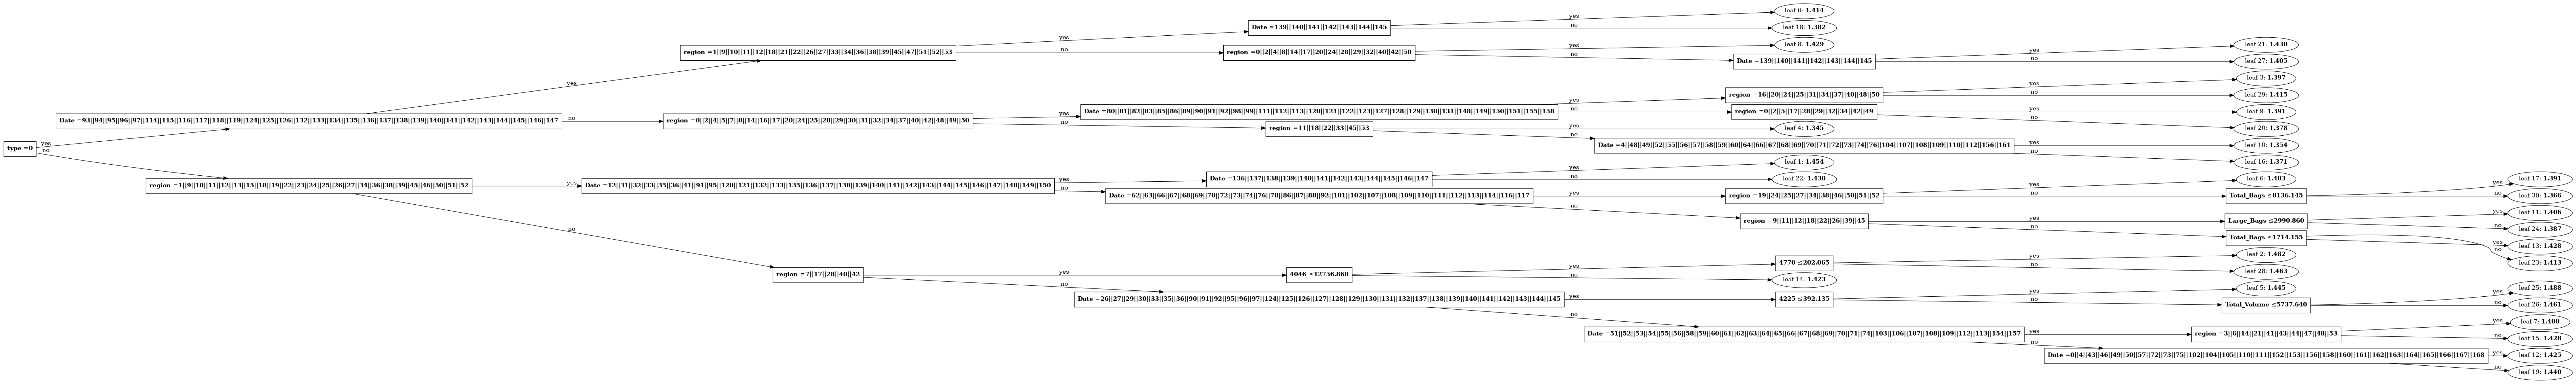

In [9]:
lgbm.plot_tree(lgbmr, tree_index=0)
fig = plt.gcf()
fig.set_size_inches(150, 100)
fig.savefig('../images/XGBoost_CatBoost_LightGBM/avocado_lightgbm_simple_dtree.png')

/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[1]	valid_0's rmse: 0.372898	valid_0's l2: 0.139053
[2]	valid_0's rmse: 0.347509	valid_0's l2: 0.120763
[3]	valid_0's rmse: 0.325071	valid_0's l2: 0.105671
[4]	valid_0's rmse: 0.305154	valid_0's l2: 0.0931191
[5]	valid_0's rmse: 0.287704	valid_0's l2: 0.0827736
[6]	valid_0's rmse: 0.272679	valid_0's l2: 0.074354
[7]	valid_0's rmse: 0.259325	valid_0's l2: 0.0672495
[8]	valid_0's rmse: 0.247431	valid_0's l2: 0.0612222
[9]	valid_0's rmse: 0.236742	valid_0's l2: 0.056047
[10]	valid_0's rmse: 0.227529	valid_0's l2: 0.0517696
[11]	valid_0's rmse: 0.219185	valid_0's l2: 0.048042
[12]	valid_0's rmse: 0.211797	valid_0's l2: 0.044858
[13]	valid_0's rmse: 0.204948	valid_0's l2: 0.0420035
[14]	valid_0's rmse: 0.198719	valid_0's l2: 0.0394891
[15]	valid_0's rmse: 0.19329	valid_0's l2: 0.0373611
[16]	valid_0's rmse: 0.188165	valid_0's l2: 0.0354059
[17]	valid_0's rmse: 0.183732	valid_0's l2: 0.0337575
[18]	valid_0's rmse: 0.179614	valid_0's l2: 0.0322613
[19]	valid_0's rmse: 0.175738	valid_0's l2: 0

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[79]	valid_0's rmse: 0.121224	valid_0's l2: 0.0146952
[80]	valid_0's rmse: 0.120983	valid_0's l2: 0.0146368
[81]	valid_0's rmse: 0.120865	valid_0's l2: 0.0146082
[82]	valid_0's rmse: 0.12065	valid_0's l2: 0.0145564
[83]	valid_0's rmse: 0.120442	valid_0's l2: 0.0145062
[84]	valid_0's rmse: 0.120213	valid_0's l2: 0.0144512
[85]	valid_0's rmse: 0.119978	valid_0's l2: 0.0143948
[86]	valid_0's rmse: 0.119818	valid_0's l2: 0.0143564
[87]	valid_0's rmse: 0.119597	valid_0's l2: 0.0143034
[88]	valid_0's rmse: 0.119441	valid_0's l2: 0.0142663
[89]	valid_0's rmse: 0.119215	valid_0's l2: 0.0142123
[90]	valid_0's rmse: 0.118988	valid_0's l2: 0.0141582
[91]	valid_0's rmse: 0.118887	valid_0's l2: 0.0141341
[92]	valid_0's rmse: 0.118705	valid_0's l2: 0.014091
[93]	valid_0's rmse: 0.118536	valid_0's l2: 0.0140509
[94]	valid_0's rmse: 0.118266	valid_0's l2: 0.0139869
[95]	valid_0's rmse: 0.118043	valid_0's l2: 0.0139341
[96]	valid_0's rmse: 0.117907	valid_0's l2: 0.0139021
[97]	valid_0's rmse: 0.117694	

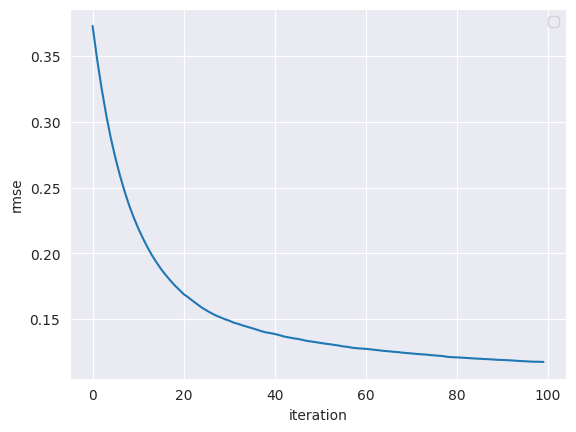

In [10]:
lgbmr.fit(X_train, y_train, eval_set=[(X_test, y_test)], eval_metric='rmse')
# Extract the training and test loss values
test_loss = lgbmr.evals_result_["valid_0"]["rmse"]

# Plot the training and test loss
plt.plot(test_loss)
plt.xlabel('iteration')
plt.ylabel('rmse')
plt.legend()
plt.show()

<AxesSubplot: xlabel='importance', ylabel='feature'>

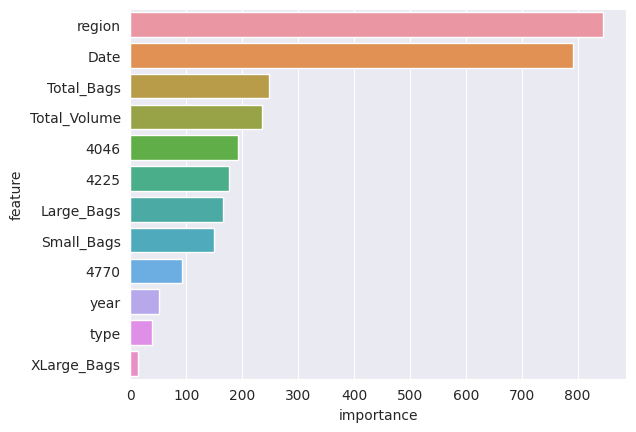

In [11]:
feature_importance = pd.DataFrame(lgbmr.feature_importances_, lgbmr.feature_name_).reset_index()
feature_importance.columns = ['feature', 'importance']
feature_importance.sort_values('importance', ascending=False, inplace=True)
sns.barplot(x='importance', y='feature', data=feature_importance)

In [12]:
X = X[["region", "Date", "Total Bags", "Total Volume"]]

# create train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,
                                                    random_state=42)

In [13]:
# Hyperparameter tuning

grid = {
    'num_iterations': [150, 200, 500],
    'learning_rate':[0.1, 0.05, 0.005],
    'num_leaves':[7, 15, 31],
    'max_depth' :[10, 15, 25],
    'min_data_in_leaf':[15, 25],
    'feature_fraction': [0.6, 0.8, 0.9],
    'bagging_fraction': [0.6, 0.8],
    'bagging_freq': [100, 200, 400]
}

In [14]:
lgbmr = lgbm.LGBMRegressor(
    categorical_feature=[0,1],
    task='predict',
    application='regression',
    objective='root_mean_squared_error',
    boosting_type="gbdt",
    reg_sqrt='True',
    metric='rmse',
    feature_fraction=0.6,
    random_state=42)

In [15]:
3 * 3 * 3 * 3 * 2 * 3 * 2 * 3

2916

In [16]:
np.power(3 * 3 * 3 * 3 * 2 * 3 * 2 * 3, 1/2)

54.0

In [17]:
random_params = RandomizedSearchCV(lgbmr, param_distributions=grid, n_jobs=54, verbose=0)

In [18]:
%%time
random_params.fit(X_train,y_train)

print (random_params.best_params_)

/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/s

{'num_leaves': 15, 'num_iterations': 500, 'min_data_in_leaf': 15, 'max_depth': 25, 'learning_rate': 0.1, 'feature_fraction': 0.6, 'bagging_freq': 100, 'bagging_fraction': 0.8}
CPU times: user 4.95 s, sys: 313 ms, total: 5.26 s
Wall time: 12.2 s


In [19]:
grid_2 = {
    'num_iterations': [500],
    'learning_rate':[0.05],
    'num_leaves':[20, 31, 40],
    'max_depth' :[10, 15, 25],
    'min_data_in_leaf':[15, 25],
    'feature_fraction': [0.85, 0.9, 0.95],
    'bagging_fraction': [0.8, 0.85],
    'bagging_freq': [400, 600]
}

In [20]:
3 * 3 * 2 * 3 * 2 * 2

216

In [21]:
np.power(3 * 3 * 2 * 3 * 2 * 2, 1/2)

14.696938456699069

In [22]:
random_params_2 = RandomizedSearchCV(lgbmr, param_distributions=grid_2, n_jobs=15, verbose=0)

In [23]:
%%time
random_params_2.fit(X_train,y_train)

print (random_params_2.best_params_)

[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] bagging_freq is set=200, subsample_freq=0 will be ignored. Current value: bagging_freq=200
[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=25, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=25
[LightGBM] [Warning] bagging_freq is set=200, subsample_freq=0 will be ignored. Current value: bagging_freq=200
[LightGBM] [Warning] feature_fraction is set=0.8, 

/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowle

{'num_leaves': 40, 'num_iterations': 500, 'min_data_in_leaf': 25, 'max_depth': 25, 'learning_rate': 0.05, 'feature_fraction': 0.85, 'bagging_freq': 600, 'bagging_fraction': 0.85}
CPU times: user 6.67 s, sys: 58.5 ms, total: 6.73 s
Wall time: 16.3 s


In [24]:
grid_3 = {
    'num_iterations': [500],
    'learning_rate':[0.05],
    'num_leaves':[40, 50],
    'max_depth' :[9, 10, 11],
    'min_data_in_leaf':[13, 15],
    'feature_fraction': [0.85],
    'bagging_fraction': [0.8],
    'bagging_freq': [400, 600]
}

In [25]:
best_model = GridSearchCV(lgbmr, grid_3)

In [26]:
%%time
best_model.fit(X_train, y_train)

/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/s

[LightGBM] [Warning] feature_fraction is set=0.85, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.85
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=13, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=13
[LightGBM] [Warning] bagging_freq is set=400, subsample_freq=0 will be ignored. Current value: bagging_freq=400


/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] feature_fraction is set=0.85, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.85
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=13, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=13
[LightGBM] [Warning] bagging_freq is set=400, subsample_freq=0 will be ignored. Current value: bagging_freq=400


/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] feature_fraction is set=0.85, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.85
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=13, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=13
[LightGBM] [Warning] bagging_freq is set=400, subsample_freq=0 will be ignored. Current value: bagging_freq=400


/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] feature_fraction is set=0.85, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.85
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=13, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=13
[LightGBM] [Warning] bagging_freq is set=400, subsample_freq=0 will be ignored. Current value: bagging_freq=400


/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] feature_fraction is set=0.85, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.85
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=13, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=13
[LightGBM] [Warning] bagging_freq is set=400, subsample_freq=0 will be ignored. Current value: bagging_freq=400


/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] feature_fraction is set=0.85, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.85
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=13, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=13
[LightGBM] [Warning] bagging_freq is set=400, subsample_freq=0 will be ignored. Current value: bagging_freq=400


/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] feature_fraction is set=0.85, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.85
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=13, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=13
[LightGBM] [Warning] bagging_freq is set=400, subsample_freq=0 will be ignored. Current value: bagging_freq=400


/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] feature_fraction is set=0.85, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.85
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=13, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=13
[LightGBM] [Warning] bagging_freq is set=400, subsample_freq=0 will be ignored. Current value: bagging_freq=400


/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] feature_fraction is set=0.85, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.85
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=13, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=13
[LightGBM] [Warning] bagging_freq is set=400, subsample_freq=0 will be ignored. Current value: bagging_freq=400


/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] feature_fraction is set=0.85, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.85
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] bagging_freq is set=400, subsample_freq=0 will be ignored. Current value: bagging_freq=400


/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] feature_fraction is set=0.85, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.85
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] bagging_freq is set=400, subsample_freq=0 will be ignored. Current value: bagging_freq=400


/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] feature_fraction is set=0.85, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.85
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] bagging_freq is set=400, subsample_freq=0 will be ignored. Current value: bagging_freq=400


/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] feature_fraction is set=0.85, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.85
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] bagging_freq is set=400, subsample_freq=0 will be ignored. Current value: bagging_freq=400


/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] feature_fraction is set=0.85, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.85
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] bagging_freq is set=400, subsample_freq=0 will be ignored. Current value: bagging_freq=400


/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] feature_fraction is set=0.85, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.85
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] bagging_freq is set=400, subsample_freq=0 will be ignored. Current value: bagging_freq=400


/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] feature_fraction is set=0.85, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.85
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] bagging_freq is set=400, subsample_freq=0 will be ignored. Current value: bagging_freq=400


/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] feature_fraction is set=0.85, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.85
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] bagging_freq is set=400, subsample_freq=0 will be ignored. Current value: bagging_freq=400


/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] feature_fraction is set=0.85, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.85
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] bagging_freq is set=400, subsample_freq=0 will be ignored. Current value: bagging_freq=400


/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] feature_fraction is set=0.85, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.85
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] bagging_freq is set=400, subsample_freq=0 will be ignored. Current value: bagging_freq=400


/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] feature_fraction is set=0.85, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.85
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=13, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=13
[LightGBM] [Warning] bagging_freq is set=400, subsample_freq=0 will be ignored. Current value: bagging_freq=400


/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] feature_fraction is set=0.85, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.85
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=13, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=13
[LightGBM] [Warning] bagging_freq is set=400, subsample_freq=0 will be ignored. Current value: bagging_freq=400


/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] feature_fraction is set=0.85, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.85
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=13, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=13
[LightGBM] [Warning] bagging_freq is set=400, subsample_freq=0 will be ignored. Current value: bagging_freq=400


/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] feature_fraction is set=0.85, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.85
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=13, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=13
[LightGBM] [Warning] bagging_freq is set=400, subsample_freq=0 will be ignored. Current value: bagging_freq=400


/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] feature_fraction is set=0.85, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.85
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=13, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=13
[LightGBM] [Warning] bagging_freq is set=400, subsample_freq=0 will be ignored. Current value: bagging_freq=400


/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] feature_fraction is set=0.85, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.85
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=13, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=13
[LightGBM] [Warning] bagging_freq is set=400, subsample_freq=0 will be ignored. Current value: bagging_freq=400


/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] feature_fraction is set=0.85, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.85
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=13, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=13
[LightGBM] [Warning] bagging_freq is set=400, subsample_freq=0 will be ignored. Current value: bagging_freq=400


/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] feature_fraction is set=0.85, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.85
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=13, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=13
[LightGBM] [Warning] bagging_freq is set=400, subsample_freq=0 will be ignored. Current value: bagging_freq=400


/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] feature_fraction is set=0.85, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.85
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=13, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=13
[LightGBM] [Warning] bagging_freq is set=400, subsample_freq=0 will be ignored. Current value: bagging_freq=400


/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] feature_fraction is set=0.85, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.85
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=13, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=13
[LightGBM] [Warning] bagging_freq is set=400, subsample_freq=0 will be ignored. Current value: bagging_freq=400


/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] feature_fraction is set=0.85, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.85
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] bagging_freq is set=400, subsample_freq=0 will be ignored. Current value: bagging_freq=400


/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] feature_fraction is set=0.85, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.85
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] bagging_freq is set=400, subsample_freq=0 will be ignored. Current value: bagging_freq=400


/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] feature_fraction is set=0.85, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.85
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] bagging_freq is set=400, subsample_freq=0 will be ignored. Current value: bagging_freq=400


/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] feature_fraction is set=0.85, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.85
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] bagging_freq is set=400, subsample_freq=0 will be ignored. Current value: bagging_freq=400


/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] feature_fraction is set=0.85, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.85
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] bagging_freq is set=400, subsample_freq=0 will be ignored. Current value: bagging_freq=400


/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] feature_fraction is set=0.85, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.85
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] bagging_freq is set=400, subsample_freq=0 will be ignored. Current value: bagging_freq=400


/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] feature_fraction is set=0.85, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.85
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] bagging_freq is set=400, subsample_freq=0 will be ignored. Current value: bagging_freq=400


/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] feature_fraction is set=0.85, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.85
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] bagging_freq is set=400, subsample_freq=0 will be ignored. Current value: bagging_freq=400


/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] feature_fraction is set=0.85, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.85
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] bagging_freq is set=400, subsample_freq=0 will be ignored. Current value: bagging_freq=400


/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] feature_fraction is set=0.85, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.85
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] bagging_freq is set=400, subsample_freq=0 will be ignored. Current value: bagging_freq=400


/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] feature_fraction is set=0.85, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.85
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=13, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=13
[LightGBM] [Warning] bagging_freq is set=400, subsample_freq=0 will be ignored. Current value: bagging_freq=400


/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] feature_fraction is set=0.85, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.85
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=13, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=13
[LightGBM] [Warning] bagging_freq is set=400, subsample_freq=0 will be ignored. Current value: bagging_freq=400


/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] feature_fraction is set=0.85, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.85
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=13, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=13
[LightGBM] [Warning] bagging_freq is set=400, subsample_freq=0 will be ignored. Current value: bagging_freq=400


/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] feature_fraction is set=0.85, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.85
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=13, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=13
[LightGBM] [Warning] bagging_freq is set=400, subsample_freq=0 will be ignored. Current value: bagging_freq=400


/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] feature_fraction is set=0.85, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.85
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=13, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=13
[LightGBM] [Warning] bagging_freq is set=400, subsample_freq=0 will be ignored. Current value: bagging_freq=400


/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] feature_fraction is set=0.85, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.85
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=13, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=13
[LightGBM] [Warning] bagging_freq is set=400, subsample_freq=0 will be ignored. Current value: bagging_freq=400


/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] feature_fraction is set=0.85, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.85
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=13, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=13
[LightGBM] [Warning] bagging_freq is set=400, subsample_freq=0 will be ignored. Current value: bagging_freq=400


/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] feature_fraction is set=0.85, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.85
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=13, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=13
[LightGBM] [Warning] bagging_freq is set=400, subsample_freq=0 will be ignored. Current value: bagging_freq=400


/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] feature_fraction is set=0.85, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.85
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=13, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=13
[LightGBM] [Warning] bagging_freq is set=400, subsample_freq=0 will be ignored. Current value: bagging_freq=400


/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] feature_fraction is set=0.85, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.85
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=13, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=13
[LightGBM] [Warning] bagging_freq is set=400, subsample_freq=0 will be ignored. Current value: bagging_freq=400


/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] feature_fraction is set=0.85, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.85
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] bagging_freq is set=400, subsample_freq=0 will be ignored. Current value: bagging_freq=400


/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] feature_fraction is set=0.85, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.85
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] bagging_freq is set=400, subsample_freq=0 will be ignored. Current value: bagging_freq=400


/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] feature_fraction is set=0.85, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.85
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] bagging_freq is set=400, subsample_freq=0 will be ignored. Current value: bagging_freq=400


/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] feature_fraction is set=0.85, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.85
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] bagging_freq is set=400, subsample_freq=0 will be ignored. Current value: bagging_freq=400


/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] feature_fraction is set=0.85, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.85
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] bagging_freq is set=400, subsample_freq=0 will be ignored. Current value: bagging_freq=400


/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] feature_fraction is set=0.85, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.85
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] bagging_freq is set=400, subsample_freq=0 will be ignored. Current value: bagging_freq=400


/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] feature_fraction is set=0.85, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.85
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] bagging_freq is set=400, subsample_freq=0 will be ignored. Current value: bagging_freq=400


/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] feature_fraction is set=0.85, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.85
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] bagging_freq is set=400, subsample_freq=0 will be ignored. Current value: bagging_freq=400


/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] feature_fraction is set=0.85, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.85
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] bagging_freq is set=400, subsample_freq=0 will be ignored. Current value: bagging_freq=400


/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] feature_fraction is set=0.85, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.85
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] bagging_freq is set=400, subsample_freq=0 will be ignored. Current value: bagging_freq=400


/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] feature_fraction is set=0.85, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.85
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=13, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=13
[LightGBM] [Warning] bagging_freq is set=600, subsample_freq=0 will be ignored. Current value: bagging_freq=600


/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] feature_fraction is set=0.85, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.85
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=13, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=13
[LightGBM] [Warning] bagging_freq is set=600, subsample_freq=0 will be ignored. Current value: bagging_freq=600


/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] feature_fraction is set=0.85, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.85
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=13, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=13
[LightGBM] [Warning] bagging_freq is set=600, subsample_freq=0 will be ignored. Current value: bagging_freq=600


/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] feature_fraction is set=0.85, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.85
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=13, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=13
[LightGBM] [Warning] bagging_freq is set=600, subsample_freq=0 will be ignored. Current value: bagging_freq=600


/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] feature_fraction is set=0.85, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.85
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=13, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=13
[LightGBM] [Warning] bagging_freq is set=600, subsample_freq=0 will be ignored. Current value: bagging_freq=600


/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] feature_fraction is set=0.85, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.85
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=13, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=13
[LightGBM] [Warning] bagging_freq is set=600, subsample_freq=0 will be ignored. Current value: bagging_freq=600


/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] feature_fraction is set=0.85, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.85
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=13, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=13
[LightGBM] [Warning] bagging_freq is set=600, subsample_freq=0 will be ignored. Current value: bagging_freq=600


/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] feature_fraction is set=0.85, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.85
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=13, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=13
[LightGBM] [Warning] bagging_freq is set=600, subsample_freq=0 will be ignored. Current value: bagging_freq=600


/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] feature_fraction is set=0.85, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.85
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=13, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=13
[LightGBM] [Warning] bagging_freq is set=600, subsample_freq=0 will be ignored. Current value: bagging_freq=600


/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] feature_fraction is set=0.85, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.85
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=13, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=13
[LightGBM] [Warning] bagging_freq is set=600, subsample_freq=0 will be ignored. Current value: bagging_freq=600


/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] feature_fraction is set=0.85, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.85
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] bagging_freq is set=600, subsample_freq=0 will be ignored. Current value: bagging_freq=600


/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] feature_fraction is set=0.85, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.85
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] bagging_freq is set=600, subsample_freq=0 will be ignored. Current value: bagging_freq=600


/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] feature_fraction is set=0.85, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.85
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] bagging_freq is set=600, subsample_freq=0 will be ignored. Current value: bagging_freq=600


/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] feature_fraction is set=0.85, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.85
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] bagging_freq is set=600, subsample_freq=0 will be ignored. Current value: bagging_freq=600


/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] feature_fraction is set=0.85, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.85
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] bagging_freq is set=600, subsample_freq=0 will be ignored. Current value: bagging_freq=600


/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] feature_fraction is set=0.85, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.85
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] bagging_freq is set=600, subsample_freq=0 will be ignored. Current value: bagging_freq=600


/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] feature_fraction is set=0.85, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.85
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] bagging_freq is set=600, subsample_freq=0 will be ignored. Current value: bagging_freq=600


/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] feature_fraction is set=0.85, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.85
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] bagging_freq is set=600, subsample_freq=0 will be ignored. Current value: bagging_freq=600


/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] feature_fraction is set=0.85, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.85
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] bagging_freq is set=600, subsample_freq=0 will be ignored. Current value: bagging_freq=600


/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] feature_fraction is set=0.85, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.85
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] bagging_freq is set=600, subsample_freq=0 will be ignored. Current value: bagging_freq=600


/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] feature_fraction is set=0.85, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.85
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=13, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=13
[LightGBM] [Warning] bagging_freq is set=600, subsample_freq=0 will be ignored. Current value: bagging_freq=600


/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] feature_fraction is set=0.85, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.85
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=13, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=13
[LightGBM] [Warning] bagging_freq is set=600, subsample_freq=0 will be ignored. Current value: bagging_freq=600


/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] feature_fraction is set=0.85, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.85
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=13, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=13
[LightGBM] [Warning] bagging_freq is set=600, subsample_freq=0 will be ignored. Current value: bagging_freq=600


/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] feature_fraction is set=0.85, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.85
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=13, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=13
[LightGBM] [Warning] bagging_freq is set=600, subsample_freq=0 will be ignored. Current value: bagging_freq=600


/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] feature_fraction is set=0.85, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.85
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=13, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=13
[LightGBM] [Warning] bagging_freq is set=600, subsample_freq=0 will be ignored. Current value: bagging_freq=600


/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] feature_fraction is set=0.85, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.85
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=13, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=13
[LightGBM] [Warning] bagging_freq is set=600, subsample_freq=0 will be ignored. Current value: bagging_freq=600


/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] feature_fraction is set=0.85, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.85
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=13, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=13
[LightGBM] [Warning] bagging_freq is set=600, subsample_freq=0 will be ignored. Current value: bagging_freq=600


/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] feature_fraction is set=0.85, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.85
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=13, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=13
[LightGBM] [Warning] bagging_freq is set=600, subsample_freq=0 will be ignored. Current value: bagging_freq=600


/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] feature_fraction is set=0.85, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.85
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=13, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=13
[LightGBM] [Warning] bagging_freq is set=600, subsample_freq=0 will be ignored. Current value: bagging_freq=600


/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] feature_fraction is set=0.85, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.85
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=13, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=13
[LightGBM] [Warning] bagging_freq is set=600, subsample_freq=0 will be ignored. Current value: bagging_freq=600


/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] feature_fraction is set=0.85, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.85
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] bagging_freq is set=600, subsample_freq=0 will be ignored. Current value: bagging_freq=600


/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] feature_fraction is set=0.85, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.85
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] bagging_freq is set=600, subsample_freq=0 will be ignored. Current value: bagging_freq=600


/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] feature_fraction is set=0.85, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.85
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] bagging_freq is set=600, subsample_freq=0 will be ignored. Current value: bagging_freq=600


/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] feature_fraction is set=0.85, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.85
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] bagging_freq is set=600, subsample_freq=0 will be ignored. Current value: bagging_freq=600


/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] feature_fraction is set=0.85, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.85
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] bagging_freq is set=600, subsample_freq=0 will be ignored. Current value: bagging_freq=600


/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] feature_fraction is set=0.85, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.85
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] bagging_freq is set=600, subsample_freq=0 will be ignored. Current value: bagging_freq=600


/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] feature_fraction is set=0.85, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.85
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] bagging_freq is set=600, subsample_freq=0 will be ignored. Current value: bagging_freq=600


/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] feature_fraction is set=0.85, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.85
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] bagging_freq is set=600, subsample_freq=0 will be ignored. Current value: bagging_freq=600


/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] feature_fraction is set=0.85, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.85
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] bagging_freq is set=600, subsample_freq=0 will be ignored. Current value: bagging_freq=600


/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] feature_fraction is set=0.85, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.85
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] bagging_freq is set=600, subsample_freq=0 will be ignored. Current value: bagging_freq=600


/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] feature_fraction is set=0.85, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.85
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=13, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=13
[LightGBM] [Warning] bagging_freq is set=600, subsample_freq=0 will be ignored. Current value: bagging_freq=600


/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] feature_fraction is set=0.85, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.85
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=13, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=13
[LightGBM] [Warning] bagging_freq is set=600, subsample_freq=0 will be ignored. Current value: bagging_freq=600


/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] feature_fraction is set=0.85, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.85
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=13, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=13
[LightGBM] [Warning] bagging_freq is set=600, subsample_freq=0 will be ignored. Current value: bagging_freq=600


/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] feature_fraction is set=0.85, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.85
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=13, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=13
[LightGBM] [Warning] bagging_freq is set=600, subsample_freq=0 will be ignored. Current value: bagging_freq=600


/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] feature_fraction is set=0.85, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.85
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=13, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=13
[LightGBM] [Warning] bagging_freq is set=600, subsample_freq=0 will be ignored. Current value: bagging_freq=600


/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] feature_fraction is set=0.85, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.85
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=13, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=13
[LightGBM] [Warning] bagging_freq is set=600, subsample_freq=0 will be ignored. Current value: bagging_freq=600


/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] feature_fraction is set=0.85, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.85
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=13, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=13
[LightGBM] [Warning] bagging_freq is set=600, subsample_freq=0 will be ignored. Current value: bagging_freq=600


/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] feature_fraction is set=0.85, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.85
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=13, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=13
[LightGBM] [Warning] bagging_freq is set=600, subsample_freq=0 will be ignored. Current value: bagging_freq=600


/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] feature_fraction is set=0.85, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.85
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=13, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=13
[LightGBM] [Warning] bagging_freq is set=600, subsample_freq=0 will be ignored. Current value: bagging_freq=600


/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] feature_fraction is set=0.85, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.85
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=13, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=13
[LightGBM] [Warning] bagging_freq is set=600, subsample_freq=0 will be ignored. Current value: bagging_freq=600


/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] feature_fraction is set=0.85, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.85
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] bagging_freq is set=600, subsample_freq=0 will be ignored. Current value: bagging_freq=600


/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] feature_fraction is set=0.85, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.85
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] bagging_freq is set=600, subsample_freq=0 will be ignored. Current value: bagging_freq=600


/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] feature_fraction is set=0.85, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.85
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] bagging_freq is set=600, subsample_freq=0 will be ignored. Current value: bagging_freq=600


/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] feature_fraction is set=0.85, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.85
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] bagging_freq is set=600, subsample_freq=0 will be ignored. Current value: bagging_freq=600


/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] feature_fraction is set=0.85, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.85
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] bagging_freq is set=600, subsample_freq=0 will be ignored. Current value: bagging_freq=600


/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] feature_fraction is set=0.85, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.85
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] bagging_freq is set=600, subsample_freq=0 will be ignored. Current value: bagging_freq=600


/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] feature_fraction is set=0.85, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.85
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] bagging_freq is set=600, subsample_freq=0 will be ignored. Current value: bagging_freq=600


/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] feature_fraction is set=0.85, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.85
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] bagging_freq is set=600, subsample_freq=0 will be ignored. Current value: bagging_freq=600


/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] feature_fraction is set=0.85, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.85
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] bagging_freq is set=600, subsample_freq=0 will be ignored. Current value: bagging_freq=600


/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] feature_fraction is set=0.85, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.85
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=15, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=15
[LightGBM] [Warning] bagging_freq is set=600, subsample_freq=0 will be ignored. Current value: bagging_freq=600


/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[LightGBM] [Warning] feature_fraction is set=0.85, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.85
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=13, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=13
[LightGBM] [Warning] bagging_freq is set=400, subsample_freq=0 will be ignored. Current value: bagging_freq=400
CPU times: user 14min 30s, sys: 3.39 s, total: 14min 33s
Wall time: 2min 1s


GridSearchCV(estimator=LGBMRegressor(application='regression',
                                     categorical_feature=[0, 1],
                                     feature_fraction=0.6, metric='rmse',
                                     objective='root_mean_squared_error',
                                     random_state=42, reg_sqrt='True',
                                     task='predict'),
             param_grid={'bagging_fraction': [0.8], 'bagging_freq': [400, 600],
                         'feature_fraction': [0.85], 'learning_rate': [0.05],
                         'max_depth': [9, 10, 11], 'min_data_in_leaf': [13, 15],
                         'num_iterations': [500], 'num_leaves': [40, 50]})

In [27]:
best_model.best_params_

{'bagging_fraction': 0.8,
 'bagging_freq': 400,
 'feature_fraction': 0.85,
 'learning_rate': 0.05,
 'max_depth': 10,
 'min_data_in_leaf': 13,
 'num_iterations': 500,
 'num_leaves': 50}

In [28]:
%%time
best_model.best_estimator_.fit(X_train, y_train, eval_set=[(X_test, y_test)], eval_metric='rmse')

[1]	valid_0's rmse: 0.388903
[2]	valid_0's rmse: 0.377373
[3]	valid_0's rmse: 0.366531
[4]	valid_0's rmse: 0.355231
[5]	valid_0's rmse: 0.343987
[6]	valid_0's rmse: 0.335834
[7]	valid_0's rmse: 0.326932
[8]	valid_0's rmse: 0.317448
[9]	valid_0's rmse: 0.308624


/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1487: UserWarning: categorical_feature keyword has been found in `params` and will be ignored.
Please use categorical_feature argument of the Dataset constructor to pass this parameter.
  _log_warning(f'{key} keyword has been found in `params` and will be ignored.\n'
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_feature in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')
/home/l/Develop/dev/FH_Projects/Analytics_and_Knowledge_Discovery/venv/lib/python3.10/s

[10]	valid_0's rmse: 0.300458
[11]	valid_0's rmse: 0.292496
[12]	valid_0's rmse: 0.284774
[13]	valid_0's rmse: 0.277394
[14]	valid_0's rmse: 0.270638
[15]	valid_0's rmse: 0.265069
[16]	valid_0's rmse: 0.260223
[17]	valid_0's rmse: 0.254489
[18]	valid_0's rmse: 0.249742
[19]	valid_0's rmse: 0.2444
[20]	valid_0's rmse: 0.240623
[21]	valid_0's rmse: 0.237125
[22]	valid_0's rmse: 0.233709
[23]	valid_0's rmse: 0.229781
[24]	valid_0's rmse: 0.22678
[25]	valid_0's rmse: 0.223247
[26]	valid_0's rmse: 0.219324
[27]	valid_0's rmse: 0.215596
[28]	valid_0's rmse: 0.213196
[29]	valid_0's rmse: 0.209869
[30]	valid_0's rmse: 0.206748
[31]	valid_0's rmse: 0.204846
[32]	valid_0's rmse: 0.201898
[33]	valid_0's rmse: 0.199136
[34]	valid_0's rmse: 0.196663
[35]	valid_0's rmse: 0.194548
[36]	valid_0's rmse: 0.193034
[37]	valid_0's rmse: 0.191094
[38]	valid_0's rmse: 0.189001
[39]	valid_0's rmse: 0.187693
[40]	valid_0's rmse: 0.185324
[41]	valid_0's rmse: 0.183708
[42]	valid_0's rmse: 0.181536
[43]	valid_0'

LGBMRegressor(application='regression', bagging_fraction=0.8, bagging_freq=400,
              categorical_feature=[0, 1], feature_fraction=0.85,
              learning_rate=0.05, max_depth=10, metric='rmse',
              min_data_in_leaf=13, num_iterations=500, num_leaves=50,
              objective='root_mean_squared_error', random_state=42,
              reg_sqrt='True', task='predict')

In [33]:
%%time
y_hat = best_model.best_estimator_.predict(X_test)
regression_report(y_test, y_hat)

Mean Absolute Error: 0.0861
Mean Absolute Percentage Error: 6.1977%
Mean Squared Error: 0.0138
Root Mean Squared Error: 0.1173
Coefficient of Determination: 0.9143
CPU times: user 414 ms, sys: 21 µs, total: 414 ms
Wall time: 89.5 ms


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


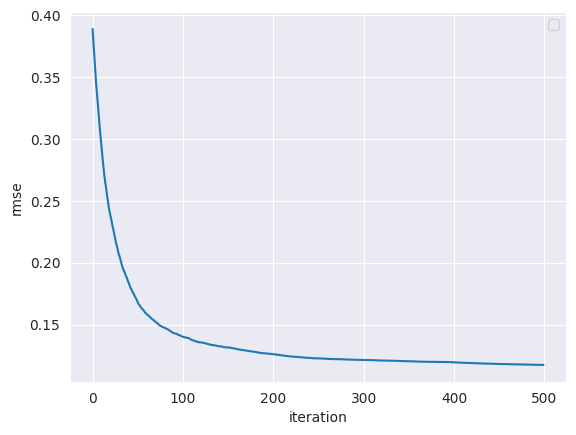

In [30]:
# Extract the training and test loss values
test_loss = best_model.best_estimator_.evals_result_["valid_0"]["rmse"]

# Plot the training and test loss
plt.plot(test_loss)
plt.xlabel('iteration')
plt.ylabel('rmse')
plt.legend()
plt.show()

<AxesSubplot: xlabel='importance', ylabel='feature'>

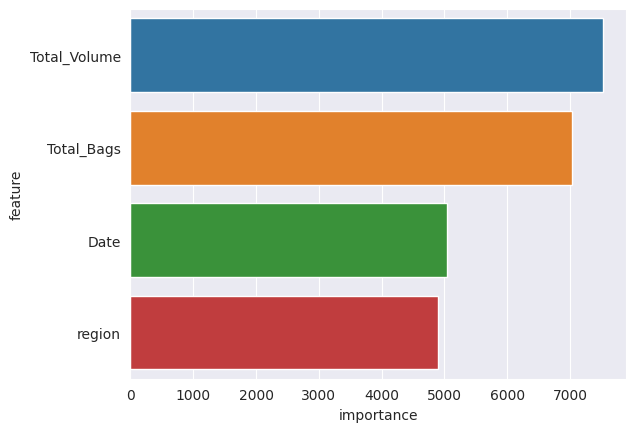

In [31]:
feature_importance = pd.DataFrame(best_model.best_estimator_.feature_importances_, best_model.best_estimator_.feature_name_).reset_index()
feature_importance.columns = ['feature', 'importance']
feature_importance.sort_values('importance', ascending=False, inplace=True)
sns.barplot(x='importance', y='feature', data=feature_importance)